Decision Trees are similar to SVMs in that they can perform both regression and classification tasks, along with multioutput tasks. The Random Forest algorithm, a very powerful ensemble algorithm, is constructed using a number of Decision Trees.

Topics:
- Training & Visualization
- The CART Training Algorithm
- Regularization
- Limitations

# Training & Visualization

We will demonstrate a Decision Tree using the iris dataset.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

# Use petal length and width
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

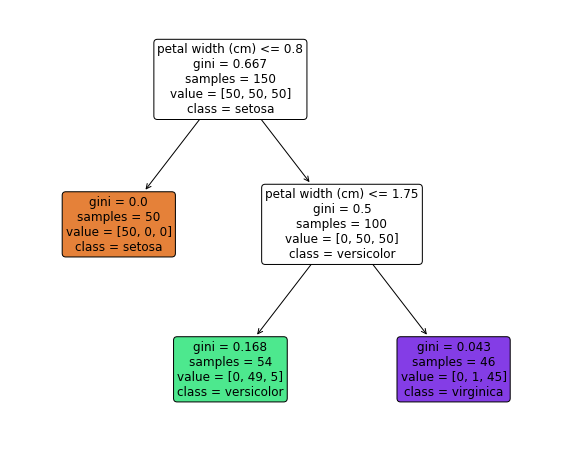

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8))
plot_tree(
    tree_clf,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True,
    fontsize=12
)
plt.show()